# Data Science & Business Analytics Internship - The Sparks Foundation

## Author - C Aparna

### Task 1:
#### Problem : Predict the percentage of an student based on the no. of study hours.

##### Importing libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Reading data

In [6]:
data = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")
data.head() 
#returns the top n rows,here top 5 rows by default

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


##### Understanding the data

In [7]:
 data.tail() 
#return the last n rows, here last 5 rows by default

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [8]:
data 
#returns all the rows 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
data.describe()
#returns the summary of basic stastical details

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
data.shape
#returns the number of rows,columns in the dataset

(25, 2)

In [11]:
data.isnull().sum()
#to check if any of the values in the dataset is null

Hours     0
Scores    0
dtype: int64

##### Visualizing the data

In [12]:
#dividing the data into attributes and labels
X=data.iloc[0:,:-1].values
X
#selecting X from the dataframe

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [13]:
Y=data.iloc[:,1].values
Y
#selecting Y from the dataframe

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

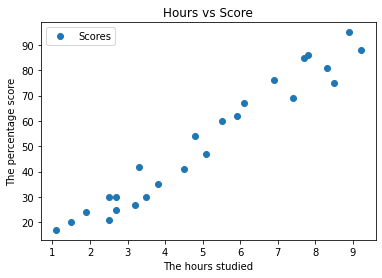

In [14]:
#plotting data by taking hours in the x-axiz and score in the y-axis
data.plot(x="Hours",y="Scores", style="o")
plt.title("Hours vs Score")
plt.xlabel("The hours studied")
plt.ylabel("The percentage score")
plt.show()

##### Preparing the test set and training set 

In [15]:
# importing libraries to test and train data using linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

In [16]:
#splitting the training set and the test set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [17]:
#training the data
reg=LinearRegression()
reg.fit(X_train,Y_train)
print("Training is complete. ")

Training is complete. 


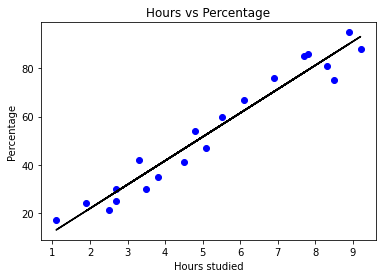

In [18]:
#to plot the scatter plot
plt.scatter(X_train, Y_train, color= 'blue')
plt.plot(X_train, reg.predict(X_train), color='black')
plt.xlabel('Hours studied')
plt.ylabel('Percentage')
plt.title('Hours vs Percentage')
plt.show()

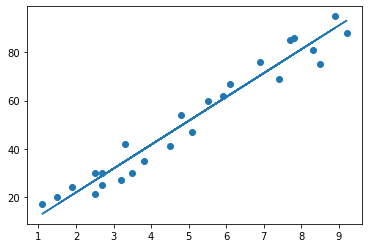

In [19]:
#to implement the plotting test data using the previously trained test data
line=reg.coef_*X+reg.intercept_
plt.scatter(X,Y)
plt.plot(X,line);
plt.show()

##### Prediction

In [20]:
pred_y=reg.predict(X_test)

In [21]:
# Comparing Actual Score vs Predicted Score
print (np.concatenate((pred_y.reshape(len(pred_y),1), Y_test.reshape(len(Y_test),1)),1))

[[16.88414476 20.        ]
 [33.73226078 27.        ]
 [75.357018   69.        ]
 [26.79480124 30.        ]
 [60.49103328 62.        ]]


In [22]:
hours = [9.25]
result = reg.predict([hours])
print("Predicted Score for 9.25 hours/day = {}".format(round(result[0],2)))

Predicted Score for 9.25 hours/day = 93.69


##### Evaluating the model

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,classification_report,confusion_matrix

In [28]:
print("Mean Absolute error :",mean_absolute_error(Y_test,pred_y))
print("Mean Squared error :",mean_squared_error(Y_test,pred_y))
print("R2 square :",r2_score(Y_test,pred_y))

Mean Absolute error : 4.183859899002982
Mean Squared error : 21.598769307217456
R2 square : 0.9454906892105354
